In [32]:
#pip install juanpy

In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import skew, kurtosis

### 

import some data

In [34]:
##FUNCION DOWNLOAD
df = yf.download('GOOG')['Adj Close'].pct_change(1).dropna() 

# create variation, you want to compute de comparision on variation, you need to standarice the variability
# obtener toda la moneda data en el same scale, need to take de varation para ver como se computan estas 2 assets( on the same scale)
# y limpiamos los datos nulos

# Crear variacion: se requiere computar la comparación entre las variaciones, para eso se debe estandarizar la variabilidad.
# Para obtener las variaciones a comparar, se las debe ajustar para que estén dentro de la misma escala.
# Debés estar trabajando en el mismo set para 2 tipo de monedas, sin datos nulos.

[*********************100%***********************]  1 of 1 completed


In [35]:
df
# mean
# es el valor conocido como medida de tendencia central y es parte de los basic summary of the data (count)
# funtions is (try librery: numba)
# hint and clue's para el proyecto en cuestion


Date
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
2004-08-26    0.018019
                ...   
2022-03-28    0.003028
2022-03-29    0.009158
2022-03-30   -0.004227
2022-03-31   -0.020996
2022-04-01    0.007522
Name: Adj Close, Length: 4436, dtype: float64

### video 7: aplication

### la media

how to compute the mean,

y como analizarla

In [36]:
mean = np.mean(df, axis=0) * 100
print(f'Daily Mean: {"%.2f" % mean} % ')

annual_mean = mean * 252 #days on a year - that market is open
print(f'Anual Mean: {"%.2f" % annual_mean} % ')

#day mean return - monthly mean return
monthly_mean = mean * 21 #days on a month - this markets is open
print(f'Montly Mean: {"%.2f" % monthly_mean} % ')

Daily Mean: 0.11 % 
Anual Mean: 27.45 % 
Montly Mean: 2.29 % 


workshop 3
variacion del precio por superficie, y categorizame a partir de que superficie empieza a ser caro

###  video 8 - la mediana
### video 9 - extreme value problem
### video 10 - Central tendency messure: the precentile
### video 11 - Application

In [37]:
### video 9

median = np.median(df, axis=0) * 100
print (f'Daily Median: {"%.2f" % median} %')


Daily Median: 0.08 %


In [38]:
### percentile
# comprender la distribucion, si ordenamos lso valores ascendentemente


In [39]:
###  video 11 - Aplication

percentile_10 = np.quantile(df, 0.10, axis=0) * 100
print (f'Centile 10%: {"%.2f" % percentile_10} %')

percentile_50 = np.quantile(df, 0.50, axis=0) * 100
print (f'Centile 50%: {"%.2f" % percentile_50} %')

percentile_99 = np.quantile(df, 0.99, axis=0) * 100
print (f'Centile 99%: {"%.2f" % percentile_99} %')

## hacer funciones - do the quiz

Centile 10%: -1.87 %
Centile 50%: 0.08 %
Centile 99%: 5.71 %


### MODULO 2 - 

### Video 12 - la varianza

* El indicador es importante, a medida que aumenta la varianza aumenta el riesgo de la estrategia.
* La varianza es siempre positiva. (porque es la sumatoria de un binomio (x-bar - x_i) con exponente al cuadrado ()**2)

### Video 13 - Aplication
### video 14 la desviacion estandar

* Es la raiz cuadrada de la varianza
* el rango de un std, es la distancia que eperamos encontrar desde cada lado de la media

##video 15

In [40]:
###  video 13

var = np.var(df, axis=0)*100
print (f'Daily Variance: {"%.2f" % var} %')

Daily Variance: 0.04 %


In [41]:
###  video 15

# annualization var : var_annualy = var daily * 252
# Annualizarion std : sqrt(var_annualy) = sqrt(var daily * 252) = sqrt(var_daily) * sqrt(252)


std = np.std(df, axis=0)*100
print (f'Daily Volatility: {"%.2f" % std} %')

annual_std = np.std(df, axis=0)*100 * np.sqrt(252)
print (f'Year Volatility: {"%.2f" % annual_std} %')

monthly_std = np.std(df, axis=0)*100 * np.sqrt(21)
print (f'Monthly Volatility: {"%.2f" % monthly_std} %')

Daily Volatility: 1.91 %
Year Volatility: 30.29 %
Monthly Volatility: 8.74 %


###  modulo 3

###  Video 16 - covarianza

* first relationship betwen two sets of datos
* el mod, si es negativo es porque los datos estan de los otros lados de las medias del otra columna

### video 17 - Assets covarianza


In [42]:
### video 17

#import several assets

df = yf.download(['GOOG', 'EURUSD=X'])['Adj Close'].pct_change(1).dropna()
df

[*********************100%***********************]  2 of 2 completed


,EURUSD=X,GOOG
Date,,
2004-08-20,-0.004042,0.079430
2004-08-23,-0.013793,0.010064
2004-08-24,-0.005763,-0.041408
2004-08-25,0.000338,0.010775
2004-08-26,0.001077,0.018019
...,...,...
2022-03-28,-0.002515,0.003028
2022-03-29,0.001088,0.009158
2022-03-30,0.008884,-0.004227


In [43]:
# variancce cov matriz

mat = np.cov(df, rowvar=False) ### default: each raw is a sample / False porque cada columna es una categoria
mat

# en el elemento 11, es la varianza de google, y el 22, es la varianza del otro activo

array([[5.35405548e-05, 6.68440524e-06],
       [6.68440524e-06, 3.51421640e-04]])

In [44]:
# covarianza

mat[0][1]

6.68440524485078e-06

In [45]:
# Variancae Covaranza  matrix
df = yf.download(['GOOG', 'EURUSD=X', 'MSFT'])['Adj Close'].pct_change(1).dropna()
mat = np.cov(df, rowvar=False) ### default: each raw is a sample / False porque cada columna es una muestra
pd.DataFrame(mat, columns = df.columns, index=df.columns)

[*********************100%***********************]  3 of 3 completed


,EURUSD=X,GOOG,MSFT
EURUSD=X,0.000054,0.000007,0.000010
GOOG,0.000007,0.000351,0.000170
MSFT,0.000010,0.000170,0.000278


###  video 19 - correlation

correlation: standarizado valor de covaranza.

-1 < coor < 0: negative relationship   
corr = 0 : no relationship   
0 < corr < 1: Positive relationship



In [46]:
### Correlation matrix
df = yf.download(['GOOG', 'EURUSD=X', 'MSFT','AMZN', 'TSLA'])['Adj Close'].pct_change(1).dropna()

df.corr()


[*********************100%***********************]  5 of 5 completed


,AMZN,EURUSD=X,GOOG,MSFT,TSLA
AMZN,1.000000,0.035207,0.574757,0.533884,0.323785
EURUSD=X,0.035207,1.000000,-0.002355,-0.009398,-0.010587
GOOG,0.574757,-0.002355,1.000000,0.627242,0.310225
MSFT,0.533884,-0.009398,0.627242,1.000000,0.334530
TSLA,0.323785,-0.010587,0.310225,0.334530,1.000000


## Domingo: 20 de marzo de 2022

### Introduction

2 ejercicios:

    - Compute de annualized "risk return compound" for microsfot price (yahoo: MSFT). Usar la variacion del precio
    
    - Calcular la covarianza and the correlation matrix fot the following category: assests [AMZN,MSFT , GOOG, EURUSD=X, "BTC-USD"]

In [47]:
## 1. Compute de annualized risk return coumple for microsfot price (yahoo: MSFT). Usar la variacion del precio

df = yf.download( 'MSFT')['Adj Close'].pct_change(1).dropna()

# compute risk return
mean = np.mean(df, axis=0) *100 * 252
vol = np.std(df, axis=0)* 100 *np.sqrt(252)

print (f'MSFT | \t return: {"%.2f mean"}  \t {"%.2f  var"}')

[*********************100%***********************]  1 of 1 completed
MSFT | 	 return: %.2f mean  	 %.2f  var


In [48]:
# Calcular la covarianza and the correlation matrix for the following assests [AMZN,MSFT , GOOG, EURUSD=X, "BTC-USD"]
df = yf.download(['GOOG', 'EURUSD=X', 'MSFT','AMZN', "BTC-USD"])

df.dropna().head()


[*********************100%***********************]  5 of 5 completed


Adj Close                                               \
                  AMZN     BTC-USD  EURUSD=X        GOOG       MSFT   
Date                                                                  
2014-09-17  324.000000  457.334015  1.295908  583.168884  40.641502   
2014-09-18  325.000000  424.440002  1.285000  587.656616  40.781292   
2014-09-19  331.320007  394.795990  1.292006  594.447937  41.515148   
2014-09-22  324.500000  402.152008  1.284142  585.761780  41.113270   
2014-09-23  323.630005  435.790985  1.285149  579.538879  40.676468   

                 Close                                               ...  \
                  AMZN     BTC-USD  EURUSD=X        GOOG       MSFT  ...   
Date                                                                 ...   
2014-09-17  324.000000  457.334015  1.295908  583.168884  46.520000  ...   
2014-09-18  325.000000  424.440002  1.285000  587.656616  46.680000  ...   
2014-09-19  331.320007  394.795990  1.292006  594.447937  47.520000  ...   
2014-09-22  324.500000  402.152008  1.284142  585.761780  47.060001  ...   
2014-09-23  323.630005  435.790985  1.285149  579.538879  46.560001  ...   

                  Open                                               \
                  AMZN     BTC-USD  EURUSD=X        GOOG       MSFT   
Date                                                                  
2014-09-17  327.760010  465.864014  1.295908  578.421936  46.259998   
2014-09-18  325.440002  456.859985  1.285017  585.392822  46.590000   
2014-09-19  327.600006  424.102997  1.292140  589.880493  46.810001   
2014-09-22  328.489990  399.100006  1.284076  592.194153  47.299999   
2014-09-23  322.459991  402.092010  1.285298  585.243225  46.849998   

               Volume                                               
                 AMZN     BTC-USD EURUSD=X       GOOG         MSFT  
Date                                                                
2014-09-17  4136000.0  21056800.0      0.0  1692835.0   38311900.0  
2014-09-18  2576900.0  34483200.0      0.0  1444555.0   35556600.0  
2014-09-19  6886200.0  37919700.0      0.0  3736631.0  202522400.0  
2014-09-22  3109700.0  24127600.0      0.0  1689526.0   38686100.0  
2014-09-23  2352600.0  45099500.0      0.0  1471429.0   33430300.0  

[5 rows x 30 columns]

In [49]:
df.columns

df = df['Adj Close']
df = df.pct_change(1).dropna()
df.head()

,AMZN,BTC-USD,EURUSD=X,GOOG,MSFT
Date,,,,,
2014-09-18,0.003086,-0.071926,-0.008417,0.007695,0.003440
2014-09-19,0.019446,-0.069843,0.005452,0.011557,0.017995
2014-09-20,0.000000,0.035735,0.000000,0.000000,0.000000
2014-09-21,0.000000,-0.024659,0.000000,0.000000,0.000000
2014-09-22,-0.020584,0.008352,-0.006087,-0.014612,-0.009680


In [50]:
df.corr()

,AMZN,BTC-USD,EURUSD=X,GOOG,MSFT
AMZN,1.000000,0.087702,0.015497,0.635468,0.634900
BTC-USD,0.087702,1.000000,-0.010122,0.114780,0.135076
EURUSD=X,0.015497,-0.010122,1.000000,-0.009342,-0.015658
GOOG,0.635468,0.114780,-0.009342,1.000000,0.729668
MSFT,0.634900,0.135076,-0.015658,0.729668,1.000000


In [51]:
df.cov()

,AMZN,BTC-USD,EURUSD=X,GOOG,MSFT
AMZN,0.000260,0.000055,1.057614e-06,1.425873e-04,1.444409e-04
BTC-USD,0.000055,0.001507,-1.663427e-06,6.201760e-05,7.399918e-05
EURUSD=X,0.000001,-0.000002,1.792106e-05,-5.504419e-07,-9.354062e-07
GOOG,0.000143,0.000062,-5.504419e-07,1.937181e-04,1.433155e-04
MSFT,0.000144,0.000074,-9.354062e-07,1.433155e-04,1.991432e-04


### video 24

new Chapter: estadistica combinatoria.

No es para novatos, pero si ya estas trabajando en un proyecto van a explicar 2 ejericios cuya finalidad práctica es ahorrar procesamiento de computos

### Permutaciones

    numero de permutaciones_ posibilidad de tener todos lso elementos de nuestro set si cada elemento de nuestro set tiene la misma cantidad de columnas.
    
    analizar combinaciones o permutaciones, factorial, factorial 0 es 1 y de 1 es 1
    
### video 26

    Arrangements: without repetition
    
    es una permutacion de "k" elementos en un set de "n" elementos, hablamos la formula, pero usamos la summary sheet
    
    para un arreglo, el orden tiene importancia no es lo mismo "ab" que "ba"
    
    hablamos de repteticion y en esta formula no tenemos repetition, la bolas no se vuelven a introducir
    
    A_kn = n! / (n-k)!
    
### Video 27: permutaciones con repeticion

    Cuando sacamos una bola de la bolsa, antes de sacar otra volvemos a meterla
    
    por lo tanto el orden no importa 
    
    A_kn = n**k (funcion de arreglo)
    
## video 28: Combinaciones sin repeticion

    Podemos encontrar el numero de combinacion de "k" elementos in this "n" elements sin repeticion?
    hay menos combinaciones que arreglos
    
    C_kn = n! / k!(n-k)!
    
    C_23 = 3/1 = 3
    
    con 2 elementos no importa el orden
    
## video 29: combinacion con repeticion

    no importa el orden

    C_kn = (n+k-1)! / k!(n-1)!
    
    C_23 = 6

## Modulo 3

### video 30

Ejercicio: hacer la combinaciones entre distintos activos


In [52]:
n = 15
np.math.factorial(n)

1307674368000

In [53]:
df = yf.download(['EURUSD=X', ])

df.dropna()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...
2022-03-28,1.098189,1.099674,1.094535,1.098189,1.098189,0
2022-03-29,1.099384,1.113635,1.097045,1.099384,1.099384,0
2022-03-30,1.109152,1.117000,1.108906,1.109152,1.109152,0


In [54]:
def combination(n, k, repetition=False):
    if repetition:
        C = np.math.factorial(n+k-1) / np.math.factorial(k) * np.math.factorial(n-1)
    else:
        C = np.math.factorial(n) / np.math.factorial(k)*np.math.factorial(n-k)
    
    return C

def permutation(n, k, repetition=False):
    if repetition:
        C = n**k
    else:
        C = np.math.factorial(n) / np.math.factorial(n-k)
    
    return C

In [55]:
combination(3,2)
#permutation(3,2, True)

3.0

### video 33

    Ejercicio:
    
    Compute de number of arrangements between the following currencies : USD; EUR; CAD (consideramos EURUSD dif a USDEUR)

In [56]:
permutation(3,2)# repeticion es false porque no puede existir EUREUR o USDUSD, es lo mismo que combinaciones(3,2) pero *2, porque solo tenes que meter la repeticion

6.0

### Video 34

Probabilidad:

    Cual es la variable aleatoria, la independecia de la variable random. 
    
    Aprender sobre probabilidad condicional
    
    
### 36. interseccion

    Es el evento que tienen los eventos ab en el mismo momento
    imaginemos que las bolas de color tienen figuras, entonces si A: es bola roja y B: a bola con triangulo
    
    P(A) = 3/9
    P(B) = 3/9
    
    P(A intersect B) = 2/9
    
### 37. Union

    La unión entre 2 eventos es la probabilidad es de que ocurra un evento, el otro, o ambos al mismo tiempo. 
    
    P(A union B) = P(A) + P(B) - P(A intersection B)


### 38- eventos independientes

    A,B son independientes si la probabilidad de A interseccion B, es igual al producto de las probabilidades
    
    Si son independientes, los assets se mueven uno sin afectar al otro
    
    Con replacement = True: la probabilidad de sacar una bola verde es siempre igual
    Sin replacement= False: la probabilidad de sacar una bola verde la proxima disminuye porque ya sacamos 1
    
    Queremos encontrar eventos dependientes en trading para que la probabilidad varíe y poder armar estrategias en base a eso, identificacion de patrones
    
### 39 eventos complementarios

    Es lo contrario al evento. Si A es sacar una bola roja, entonces B es sacar una bola que no sea roja.

In [57]:
##VIDEO 35
# Variable random: X

# DOMINIO DE LA VARIABLE RANDOM (set) {}

# weights of events. peso de los eventos (%)

# omega es el dominio

# la suma de la probabilidad de los eventos, debe ser igual a 1

# P(omega) = 1

# la variable random es un objeto estadistico: y la probabilidad de que cada evento ocurra


# LUNES 21 DE MARZO DE 2022
## CAPITULO 4

### Video 40: Probabilidad condicional

    Ejemplo del juego de cartas: 2 eventos A: king card o B: heart card / 32 cartas el mazo
    
    P(A)_B = 1/32 / 1/4 = 1/8: AyB son independientes  porque la probabilidad es la misma que P(A)
    
    P(A)_B = P(A intersection B) / P(B) = P(A)
    
    
### video 41: teoria de Bayes

    P(A)_B = (P(B)_A * P(A)) / P(B)
    
    la probabilidad condicional de A respecto de B es igual a la probilidad condicional de B respecto de A por la probabilidad de A dividido la probabilidad de B
    
    Queremos determinar P(B)_A, por lo que determinamos todo el resto
    
### video 43: Introduccion

    compute a conditional probability. para determinar el 50% y el 70%

# SABADO 2 DE ABRIL
## CAPITULO 4

### Video 40: Probabilidad condicional

    compute a conditional probability to align at any stock market para incrementar en goodreads, determinar el incremento del 50% al 70%

In [58]:
!pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28909 sha256=7a2db20275d28301c614e48e2eab0892c64b52cbf2376bde87fa582aa64758c4
  Stored in directory: c:\users\agustin\appdata\local\pip\cache\wheels\c4\71\30\9b87e7cc8350a4226ffbed6e4a6a923ac720845398895eb35d
Successfully built ta


In [59]:
!pip install scipy==1.7.1

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\Agustin\\anaconda3.2\\Lib\\site-packages\\~cipy\\integrate\\lsoda.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2


In [60]:
import numpy as np
import pandas as pd
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [61]:
# the code here will allow you to switch your graphics to darj mode for those who choose to code in dark mode

import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
              ['#669FEE', '#66EE91', '#9988DD',
              '#EECC55', '#88BB44', '#FFBBBB']
              )

plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none',
      axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray'
      )
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')

In [62]:
# Import the data and create variations of Google
df = yf.download('GOOG')[['Adj Close']].pct_change(1).dropna()
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
2004-08-26,0.018019
...,...
2022-03-28,0.003028
2022-03-29,0.009158
2022-03-30,-0.004227


### Probability

In [63]:
# Compute the chance of a increase
p_increase = len(df[df['Adj Close'] > 0]) / len (df) *100

# Compute the chance of a decrease
p_decrease = len(df[df['Adj Close'] < 0]) / len(df) *100

# Increase + Decrease close to one but not mandatory equal 1
print (f'Weight | \t Increase: {"2%.2f" % p_increase} \t Decrease: {"%.2f" % p_decrease}')

Weight | 	 Increase: 252.66 	 Decrease: 47.32


In [64]:
from ta.volatility import BollingerBands

In [65]:
# Import close price
df = yf.download('EURUSD=X')[['Adj Close']]

# Create the return
df['return'] = df['Adj Close'].pct_change(1).dropna()

[*********************100%***********************]  1 of 1 completed


In [68]:
# Initialize BB class 
indicator_bb = BollingerBands(close=df['Adj Close'], window=20, window_dev=1.5)

# Add Bollinger Band features
df['bb_bbl'] = indicator_bb.bollinger_lband()
df['bb_bbh'] = indicator_bb.bollinger_hband()

<AxesSubplot:xlabel='Date'>

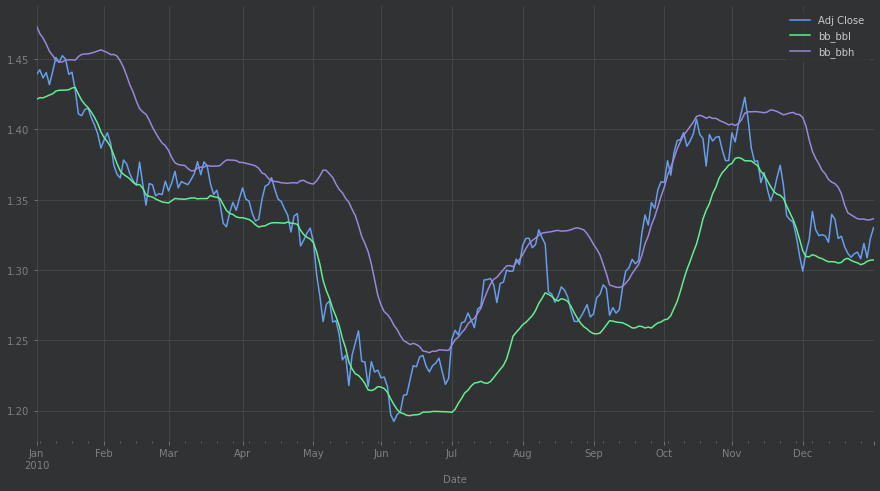

In [70]:
df[['Adj Close', 'bb_bbl',	'bb_bbh']].loc['2010'].plot(figsize=(15,8))

In [73]:
# Import close price
df = yf.download('ETH-USD')[['Adj Close']]

# Create the return
df['return'] = df['Adj Close'].pct_change(1).dropna()

# Initialize BB class
indicator_bb = BollingerBands(df['Adj Close'], window=20, window_dev=1.5)

# Add Bollinger Bands feature
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Shift the values
df['Adj Close Yesterday'] = df['Adj Close'].shift(1)
df['bbh Yesterday'] = df['bb_bbh'].shift(1)

# Drop the raw containing missing values
df = df.dropna()

# Variable initialization
n = 10 # numero de dias (vamos a computar la variacion de la señal del día 1, 2, 3, ..., n)
dates = [] # cda vez que aparece una señal que se agende en la date_list
returns = []# keep the 

#
for i in range(len(df) - n - 1):
    row = df.iloc[i:i+1, :]
    # Create signal condition
    if (row['Adj Close Yesterday'].values[0] < row['bbh Yesterday'].values[0]) and\
    (row['Adj Close'].values[0] > row['bb_bbh'].values[0]):
        
        # Save data
        dates.append(row.index[0])
        
        # Compute the return from signal to 10days later
        ret = []
        
        for day in range(1,n):
            ret.append(df.iloc[i+day: i+1+day, :]['return'].values[0])
        returns.append(ret)

# List of lists to dataframe
df_returns = pd.DataFrame(returns).cumsum(axis=1)

[*********************100%***********************]  1 of 1 completed


In [74]:
# Signal (1%, 0.5%, ...)  --> (1%, 1,5%, ...) - daily variation after 10 days 
df_returns;

,0,1,2,3,4,5,6,7,8
0,0.264581,0.343386,0.333495,0.317157,0.334340,0.368477,0.472189,0.512682,0.503325
1,0.088503,0.107410,0.124535,0.168595,0.275624,0.271600,0.403256,0.369464,0.289126
2,0.096780,0.075547,0.020783,-0.163617,-0.201048,-0.179327,-0.176606,-0.064923,-0.156313
3,0.017744,0.078014,0.039355,0.023209,0.066747,0.148875,0.233098,0.216332,0.243529
4,0.082128,0.166351,0.149585,0.176782,0.210050,0.312159,0.181197,0.258206,0.234403
...,...,...,...,...,...,...,...,...,...
68,0.004885,-0.010281,-0.021539,-0.013662,0.008227,0.049680,0.033675,0.012789,0.033110
69,0.041452,0.025447,0.004562,0.024882,0.011507,0.008153,0.002756,-0.012127,-0.086979
70,-0.006321,0.031100,-0.018901,-0.067674,-0.071097,-0.082717,-0.065372,0.018624,0.002256
71,0.000310,-0.028811,-0.015695,0.010239,0.029725,0.055127,0.054680,0.066431,0.113644


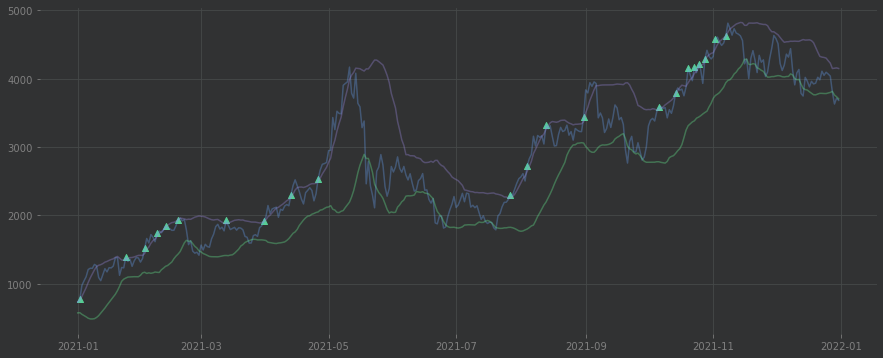

In [78]:
# We plot all the signal to be sure that the be correct

# Select all signal in a index list to plot only this points
idx = dates
year = '2021'

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the open long signal in green
plt.scatter(df.loc[idx].loc[year].index, df.loc[idx]['Adj Close'].loc[year], color='#57CE95', marker='^')

# Plot the point of the close long signal in blue

# Plot the rsi to be sure that the conditions are completed
plt.plot(df['Adj Close'].loc[year].index, df['Adj Close'].loc[year], alpha=0.35)
plt.plot(df['bb_bbl'].loc[year].index, df['bb_bbl'].loc[year], alpha=0.35)
plt.plot(df['bb_bbh'].loc[year].index, df['bb_bbh'].loc[year], alpha=0.35)

# Show the graph
plt.show()

In [80]:
# Compute %Increase %Decrease of return from signal to 10days later
for i in range(n-1): #
    g = df_returns.iloc[:, i:i+1].values
    p_increase = len(g[g>0])/len(g) *100
    p_decrease = len(g[g<0])/len(g) *100
    
    print (f'Weights day {i+1}| \t Increase: {"%.2f" % p_increase} %\t Decrease: {"%.2f" % p_decrease} %')
print('')

# Compute %Increase %Decrease of the asset on all the situations
p_increase = len(df[df['return'] > 0]) / len(df) *100
p_decrease = len(df[df['return'] < 0]) / len(df) *100
print(f'Weights| \t Increase: {"%.2f" %p_increase} % \t Decrease: {"%.2f" % p_decrease} %')



Weights day 1| 	 Increase: 56.16 %	 Decrease: 43.84 %
Weights day 2| 	 Increase: 60.27 %	 Decrease: 39.73 %
Weights day 3| 	 Increase: 67.12 %	 Decrease: 32.88 %
Weights day 4| 	 Increase: 64.38 %	 Decrease: 35.62 %
Weights day 5| 	 Increase: 67.12 %	 Decrease: 32.88 %
Weights day 6| 	 Increase: 67.12 %	 Decrease: 32.88 %
Weights day 7| 	 Increase: 68.49 %	 Decrease: 31.51 %
Weights day 8| 	 Increase: 71.23 %	 Decrease: 28.77 %
Weights day 9| 	 Increase: 69.86 %	 Decrease: 30.14 %

Weights| |t Increase: 52.08 % 	 Decrease: 47.92 %


In [83]:
# Compute %Increase %Decrease of return from signal to 10days later
for i in range(n-1): #
    g = df_returns.iloc[:, i:i+1].values - 0.01 # cost of transaction in percent
    p_increase = len(g[g>0])/len(g) *100
    p_decrease = len(g[g<0])/len(g) *100
    
    print (f'Weights day {i+1}| \t Increase: {"%.2f" % p_increase} %\t Decrease: {"%.2f" % p_decrease} %')
print('')

# Compute %Increase %Decrease of the asset on all the situations
p_increase = len(df[df['return'] > 0]) / len(df) *100
p_decrease = len(df[df['return'] < 0]) / len(df) *100
print(f'Weights| \t Increase: {"%.2f" %p_increase} % \t Decrease: {"%.2f" % p_decrease} %')

Weights day 1| 	 Increase: 43.84 %	 Decrease: 56.16 %
Weights day 2| 	 Increase: 57.53 %	 Decrease: 42.47 %
Weights day 3| 	 Increase: 57.53 %	 Decrease: 42.47 %
Weights day 4| 	 Increase: 57.53 %	 Decrease: 42.47 %
Weights day 5| 	 Increase: 60.27 %	 Decrease: 39.73 %
Weights day 6| 	 Increase: 60.27 %	 Decrease: 39.73 %
Weights day 7| 	 Increase: 64.38 %	 Decrease: 35.62 %
Weights day 8| 	 Increase: 69.86 %	 Decrease: 30.14 %
Weights day 9| 	 Increase: 67.12 %	 Decrease: 32.88 %

Weights| 	 Increase: 52.08 % 	 Decrease: 47.92 %


In [85]:
m = 8

dft = df['Adj Close'].pct_change(m).dropna()

# Compute %Increase %Decrease of the asset on all the situations
p_increase = len(dft[dft>0]) / len(dft) *100
p_decrease = len(dft[dft<0]) / len(dft) *100
print(f'Weights day {m}| \t Increase: {"%.2f" %p_increase} % \t Decrease: {"%.2f" % p_decrease} %')

Weights day 8| 	 Increase: 54.75 % 	 Decrease: 45.25 %


### Hypothesis test (this part comes with chapter "hypothesis test". dont read it before)

In [88]:
df_returns.iloc[:, -1].values

np.mean(df_returns.iloc[:, -1].values)

print ('esta es la diferencia entre los porcentajes de probabilidad, a partir de 10% de probabilidad de subir que de bajar es bueno, o sea 45 55')

esta es la diferencia entre los porcentajes de probabilidad, a partir de 10% de probabilidad de subir que de bajar es bueno, o sea 45 55


# SABADO 2 DE ABRIL DE 2022
## CAPITULO 5

### video 43: Introduccion

### video 49: Introduccion

EJERCICIO: Compute the value at risk of a financial asset

EJERCICIO: Analyze the stop loss and take profit

# video 50: law of probability

ya vimos una variable aleatoria, y que pertenece a omega el fominio, y specifict behavoure

el comportamiento se define como law of probability

Discrete: finite posibilidades
una binomiial  n=30 and p=0.5
histograma forma de campana que lelga a 0.14

Continuous: infinitas posibilidades
el dominio omega tiene infinitas posibilidades entre 0 y 10, 

## Bernoulli law
2 posibilidades Success or fail
X~B(1,p)

P(X=x) = {1: p if x = success,
            2: 1-p if x = fail,
            3: 0 otherwise
            }
            
## Binomial law
Representa several Bernoulli simulations
Asumimos:

    - Random experience
    - Independient experience (¿probabilidad condicional?)

X ~ B(n,p) <=> P(X=x) = (C**x)__n * p**x * (1-p)**(n-x)
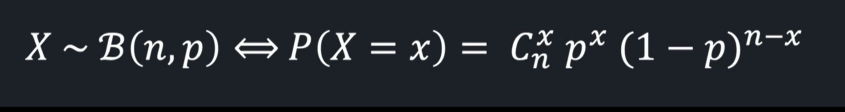

-

## Poisson law

En finanzas, se usa por simular chocs (stocastics, like new information) on the market

X ~ Pois(lambda) <=> P(X=x) = e**(-lambda) * lambda**x / x!

## Continous uniforme law

La distribucion es uniformemente disrtibuida

X ~ U(a,b) P(X < x) = (x - a) / (b - a) when x bellow in [a, b]

pdf: partial distribution function (la reparticion de la realizacion de una variable aleatoria)

cdf: cumulative distribution function (para computar some probability)

## Exponential law
X ~ Exp(Beta)
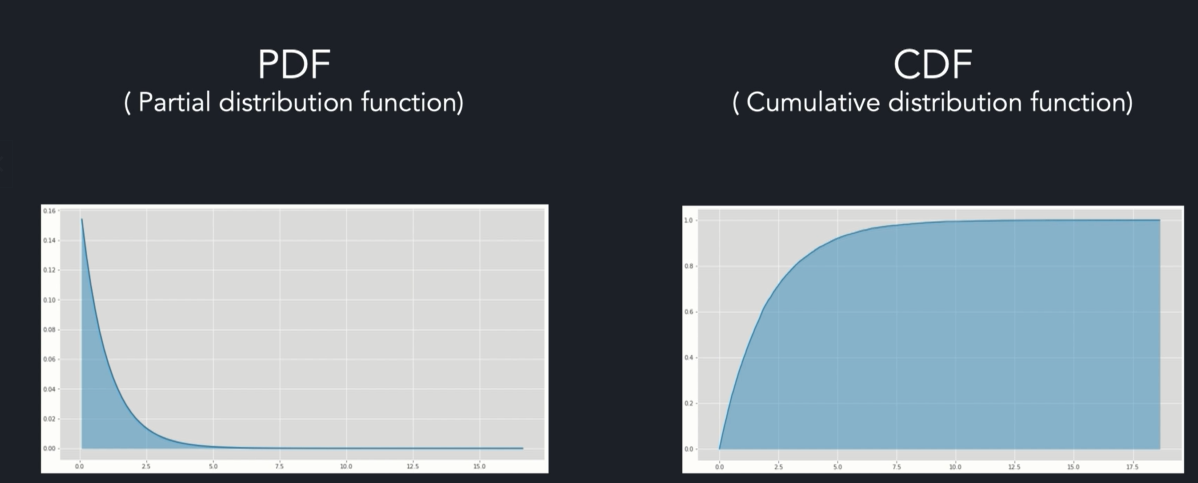

pdf. tiene a lot of value at the biginins, la probabilidad de tener un valor especifico al comienzo es tanto.
tiene a lot of chances to have to be realized at the beginin

## Normal law

X ~ U(mu, sigma)

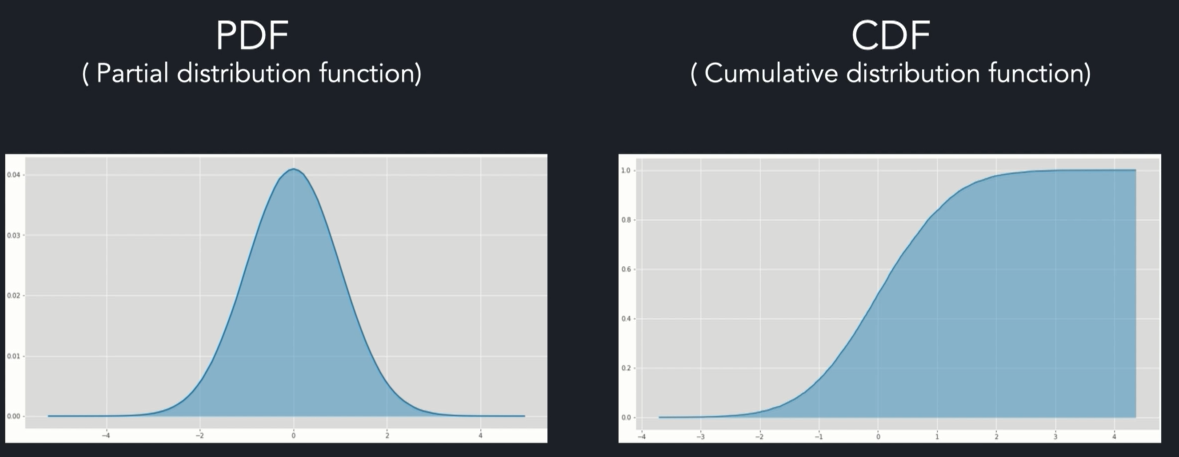




In [90]:
# --------------- Initialiaze distribution setting --------------
# Number of iterations
n = 10

# Probability of success
p = 0.6

# --------------- Compute the probability ---------------
# list of possible number of success
nb_success = list(range(n + 1))

# list pf pmf values
proba = [binom.pmf(b, n, p) for b in nb_success]

# --------------- Plot the density ---------------
# Adapt the size
plt.figure(figsize=(15, 8))

# Plot the distribution
plt.bar(nb_success, proba, color='#1586BA')

# Give x/y labels and a title
plt.title(f'Binomial distribution N={n} and p={p}', size=16)
plt.xlabel('Number of success', size=13)
plt.ylabel('Probability', size=13)

plt.show()
# ---------------   ---------------
# ---------------   ---------------

NameError: name 'binom' is not defined

In [89]:
# Video 59: Compute a Value at risk

df = yf.download('GOOG').pct_change(1).dropna()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:ylabel='Density'>

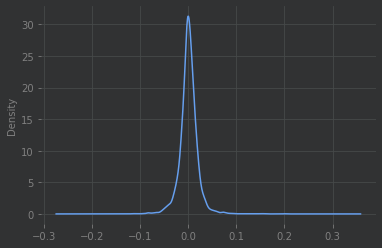

In [91]:

df['Close'].plot(kind='kde')

In [92]:
VaR = np.percentile(df['Close'], 0.05)*100
print (f'Value at risk: {"%.2f" %VaR} %')

Value at risk: -9.65 %
